In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import math
from scipy.special import expit
from scipy.optimize import minimize
from scipy.misc import toimage

In [4]:
infile=loadmat('ex3data1.mat')

In [5]:
infile.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [6]:
X=infile['X'].copy()
y=infile['y'].copy()
X=np.insert(X,0,1,axis=1)
X.shape

(5000, 401)

#### 1.2 Data visualization

In [7]:
idx=np.random.randint(0,5000,size=100)

In [8]:
toimage(X[1,1:].reshape((20,20)).T)

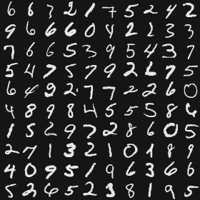

In [9]:
height = 20
width = 20
nrow = 10
ncol = 10
image_mat=np.zeros((height*nrow,width*ncol))
irow=0
icol=0
for i in idx:
    toview=X[i,1:].reshape((width,height)).T
    if icol == ncol:
        irow+=1
        icol=0
    image_mat[irow*height:(irow+1)*height,icol*width:(icol+1)*width]=toview
    icol+=1
toimage(image_mat)

In [10]:
def sigmoid(x):
    return 1.0/(1.0+np.exp(-x))
    
sigmoid(10),sigmoid(-10),sigmoid(0)

(0.99995460213129761, 4.5397868702434395e-05, 0.5)

In [11]:
def compute_cost(theta,X,y,mylambda=0):
    """
    theta is a 1-d array of n dimension (reshape necessary)
    y is a matrix of m x 1 dimension
    X is a matrix of m*n dimension
    """
    m=X.shape[0]
    n=X.shape[1]
    theta_v=theta.reshape((n,1))
    theta_r=theta_v.copy()
    theta_r[0]=0
    hx=sigmoid(X.dot(theta_v))
    term_1=-y.T.dot(np.nan_to_num(np.log(hx)))
    term_2=-(1-y).T.dot(np.nan_to_num(np.log(1-hx)))
#     Try a more numberical stable version of this implementation
    term_reg=theta_r.T.dot(theta_r)*mylambda/(2*m)
    J=float((term_1+term_2)/m+term_reg)
    return J

In [12]:
theta_ini=np.zeros(X.shape[1])
compute_cost(theta_ini,X,y,100)

160.39425758157077

In [13]:
def compute_grad(theta,X,y,mylambda=0):
    m=X.shape[0]
    n=X.shape[1]
    theta_v=theta.reshape((n,1))
    theta_r=theta_v.copy()
    theta_r[0]=0
    hx=sigmoid(X.dot(theta_v))
    grad=(X.T.dot(hx-y)+mylambda*theta_r)/m
    return grad.flatten()


In [14]:
def fit_theta(y,mylambda=0):
    results=minimize(compute_cost,theta_ini,args=(X,y,mylambda),method='CG',jac=compute_grad)
    return results.x,results.fun

In [15]:
K=10
n=X.shape[1]
theta_matrix=np.zeros((n,K))
for i in range(1,11):
    y_k=(y==i).astype(int)
    theta_i,fun_i=fit_theta(y_k,0.00)
    theta_matrix[:,(i-1)]=theta_i
    print('number %d optimization complete'%i)
    print('minimized cost function output %0.3f'%fun_i)
print('Done')

number 1 optimization complete
minimized cost function output 0.000


C:\Users\miluo\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log
  


number 2 optimization complete
minimized cost function output 0.023
number 3 optimization complete
minimized cost function output 0.039
number 4 optimization complete
minimized cost function output 0.004
number 5 optimization complete
minimized cost function output 0.030
number 6 optimization complete
minimized cost function output 0.000
number 7 optimization complete
minimized cost function output 0.003
number 8 optimization complete
minimized cost function output 0.519
number 9 optimization complete
minimized cost function output 0.054


C:\Users\miluo\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log
  


number 10 optimization complete
minimized cost function output 0.000
Done


In [16]:
pred_mat=X.dot(theta_matrix)

In [17]:
def predict_handwriting(pred_mat):
    """
    Take a prediction probability matrix
    output prediction based on the most likely outcome.
    Note that number 10 should be predicted as zero
    """
    m=pred_mat.shape[0]
    idx_max=np.apply_along_axis(np.argmax,1,pred_mat) 
    predict_array=idx_max+1
    return predict_array.reshape((m,1))

In [18]:
pred_outcome=predict_handwriting(pred_mat)

In [19]:
np.mean(pred_outcome==y)

0.94899999999999995

#### A handful interesting things that I've learned from the above exercise:
#### 1. logistic (sigmoid) function is not numerically stable as the hx can easily go to zero from X.dot(theta) leading, Inf from the subsequent log term.
#### 2. Regularization seemed to be able to fix this problem. (I am currently looking for alternative forms for sigmoid function to potentially solve this problem without resorting to setting a small lambda term. And I will update this)
#### 3. It is always a good idea to print out the J(min) from minimizatin problem, as a easy way to detect abnormaly (in my original test the output from J is 'nan'. (Never a good sign!)
#### 4. in a multi-class logistic regression print out J(min) by class also serves as a good starting point for error analysis. From the output above, it looks like logistic regression gives a significantly worse prediction when the number is'8'.
#### 5. UPDATE: one easy fix to solve the numeric issue in cost function implementation is that to apply np.nan_to_num function after the log term.

In [20]:
infile2=loadmat('ex3weights.mat')

In [21]:
infile2.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Theta1', 'Theta2'])

In [22]:
theta1=infile2['Theta1']
theta2=infile2['Theta2']

In [23]:
theta1.shape,theta2.shape

((25, 401), (10, 26))

In [24]:
X.shape

(5000, 401)

In [45]:
def nnprediction(X,theta1,theta2):
    m=X.shape[0]
    hidden=sigmoid(theta1.dot(X.T))
    hidden=np.insert(hidden,0,1,axis=0)
    out=sigmoid(theta2.dot(hidden)).T
    pred=np.apply_along_axis(np.argmax,1,out)+1
    return pred.reshape((m,1))

In [46]:
nn_pred=nnprediction(X,theta1,theta2)

In [47]:
np.mean(nn_pred==y)

0.97519999999999996